# Une régression logistique sur la couleur d'un vin

**L'objectif de cet exercice est de prédire la couleur d'un vin à partir de ses composants et visualiser la performance avec une courbe ROC.**

## Import des librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import des données

Vous pouvez allez chercher les données [là](https://archive.ics.uci.edu/ml/datasets/wine+quality). Ou bien récupérer directement les csv que vous avez dans le dossier Data.  
Vous verrez que l'on a 2 tables : une pour les vins rouges et une pour les vins blancs.

#### **1. Chargez et fusionnez ces deux datasets pour en avoir un seul. En l'état, il n'y pour l'instant pas de variable y dans vos données. Il faut donc que vous l'ajoutiez vous-mêmes.**

In [2]:
rouges = pd.read_csv('Data/winequality-red.csv', sep=';')
rouges['couleur'] ='rouge'
rouges

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,couleur
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,rouge
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,rouge
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,rouge
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,rouge
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,rouge
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,rouge
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,rouge
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,rouge
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,rouge


In [3]:
blancs = pd.read_csv('Data/winequality-white.csv', sep=';')
blancs['couleur'] = 'blanc'
blancs

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,couleur
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,blanc
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,blanc
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,blanc
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,blanc
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,blanc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,blanc
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,blanc
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,blanc
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,blanc


In [4]:
vins = pd.concat([rouges, blancs], axis=0)
vins = vins.sample(frac=1, ignore_index=True)
vins

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,couleur
0,6.8,0.290,0.49,1.4,0.142,52.0,148.0,0.99370,3.08,0.49,9.0,6,blanc
1,6.0,0.210,0.30,8.7,0.036,47.0,127.0,0.99368,3.18,0.39,10.6,5,blanc
2,6.7,0.210,0.37,2.5,0.034,35.0,89.0,0.99130,3.25,0.50,11.0,7,blanc
3,7.5,0.725,0.04,1.5,0.076,8.0,15.0,0.99508,3.26,0.53,9.6,5,rouge
4,6.7,0.480,0.32,1.4,0.021,22.0,121.0,0.98890,3.15,0.53,12.7,7,blanc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.0,0.320,0.24,6.2,0.048,31.0,228.0,0.99570,3.23,0.62,9.4,6,blanc
6493,6.8,0.180,0.28,9.8,0.039,29.0,113.0,0.99406,3.11,0.45,10.9,7,blanc
6494,7.8,0.300,0.37,1.3,0.051,16.0,96.0,0.99410,3.32,0.62,10.0,5,blanc
6495,6.8,0.610,0.20,1.8,0.077,11.0,65.0,0.99710,3.54,0.58,9.3,5,rouge


## Un peu de dataviz

Quelques graphiques parce que c'est joli mais pas que !

#### **2. Visualisez avec des graphiques de votre choix les distributions des différentes variables indépendantes selon la couleur du vin.**

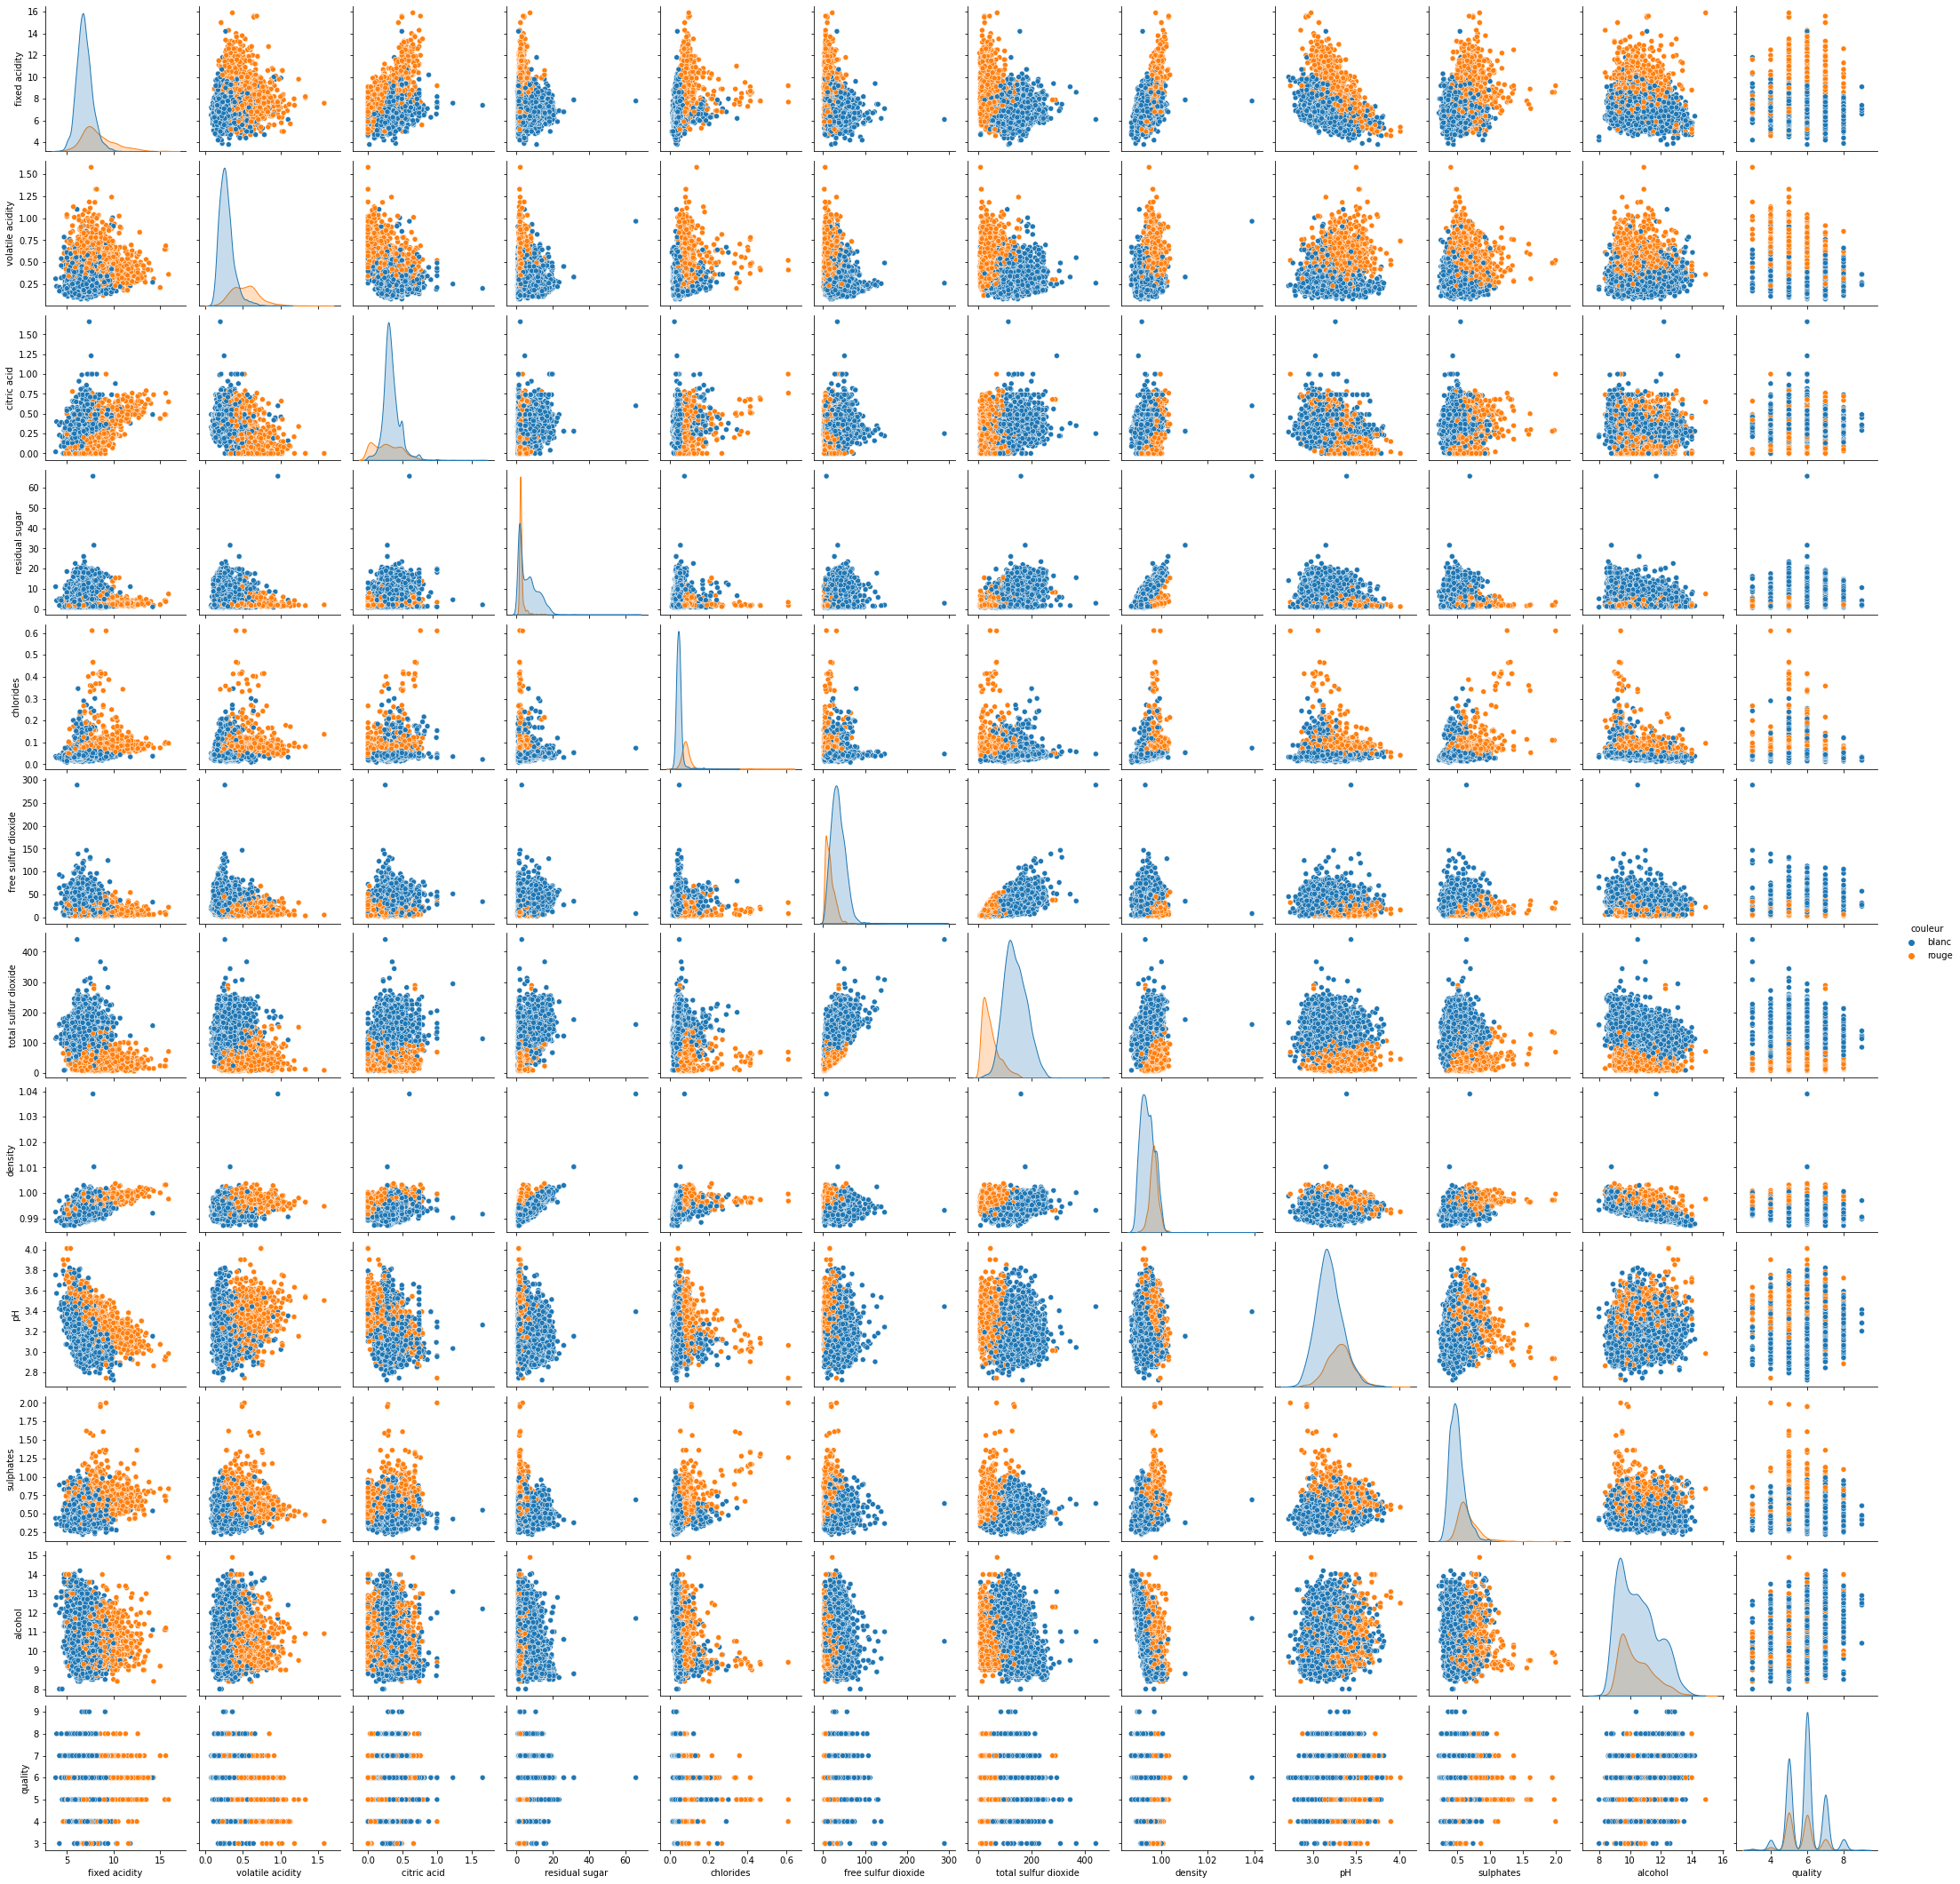

In [5]:
sns.pairplot(data=vins, hue='couleur');

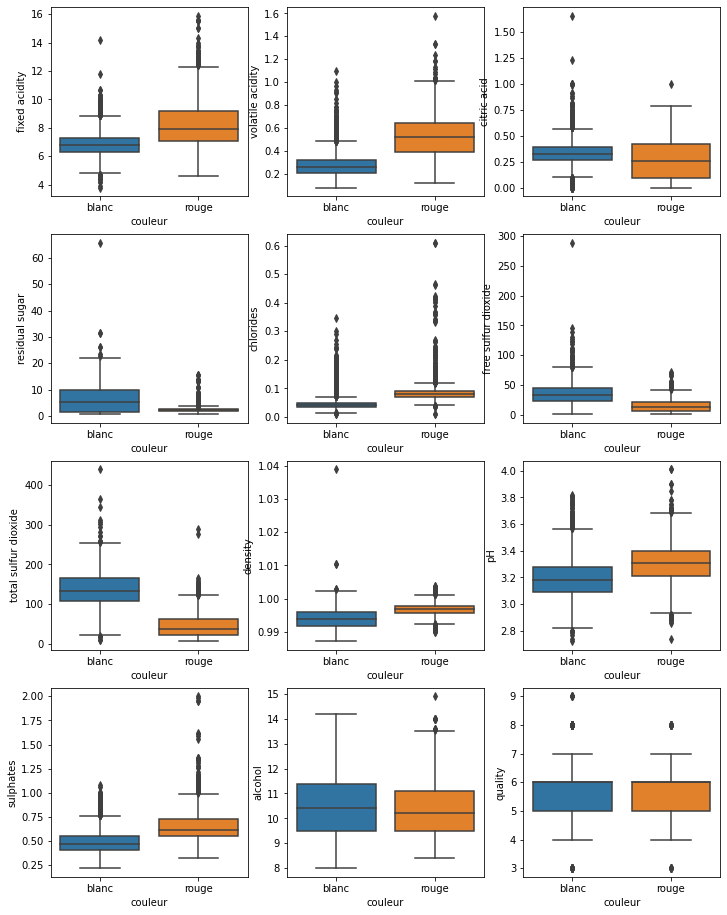

In [6]:
fig = plt.figure(figsize=(12,16))

for i in range(12):
    fig.add_subplot(4,3,i+1)
    sns.boxplot(x='couleur', y=vins.columns[i], data=vins)

## Création d'un train set et test set

#### **3. Créez vos échantillons d'entraînement et de test.**

In [7]:
X = vins.drop(['quality', 'couleur'], axis=1)
y = vins['couleur']

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5197, 11), (1300, 11), (5197,), (1300,))

In [9]:
y_train.value_counts(), y_test.value_counts()

(blanc    3918
 rouge    1279
 Name: couleur, dtype: int64,
 blanc    980
 rouge    320
 Name: couleur, dtype: int64)

In [10]:
# standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Création et entraînement du modèle

#### **4. Mettez en place et entraînez une régression logistique.**

In [11]:
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression()
reglog.fit(X_train, y_train)

LogisticRegression()

In [12]:
# prédictions sur le test set
y_pred = reglog.predict(X_test)
pd.Series(y_pred).value_counts()

blanc    986
rouge    314
dtype: int64

## Évaluation du modèle

La première façon de vérifier que le modèle a marché consiste à regarder la matrice de confusion.

Un classifieur construit une frontière entre deux classes, la distance d'un point à la frontière constitue une information importante. Plus elle est grande, plus le modèle est confiant. Cette distance est souvent appelée *score*.

Toutefois, on préfère en général les probabilités quand elles sont disponibles.

#### **5. Calculez la matrice de confusion, le score et les probabilités.**

In [13]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, y_pred),
             columns=[f'predit {k}' for k in reglog.classes_],
             index = [f'vrai {k}' for k in reglog.classes_])

,predit blanc,predit rouge
vrai blanc,977,3
vrai rouge,9,311


In [14]:
reglog.score(X_train, y_train), reglog.score(X_test, y_test)

(0.99345776409467, 0.9907692307692307)

In [15]:
# score
score = reglog.decision_function(X_test)
score

array([  4.42013259,  -6.39142497, -12.75004797, ...,  -9.5054818 ,
        -5.36625065,  -6.13242086])

In [16]:
# probas
probas = reglog.predict_proba(X_test)
probas

array([[1.18895739e-02, 9.88110426e-01],
       [9.98326937e-01, 1.67306262e-03],
       [9.99997098e-01, 2.90217276e-06],
       ...,
       [9.99925563e-01, 7.44370882e-05],
       [9.95350108e-01, 4.64989155e-03],
       [9.97833386e-01, 2.16661374e-03]])

In [27]:
reglog.classes_

array(['blanc', 'rouge'], dtype=object)

#### **6. Regardez la distribution du score et des probabilités.**

In [28]:
df = pd.DataFrame(probas, columns=['Proba_blanc','Proba_rouge'])
df['score'] = score
df['couleur'] = y_test.values
df.head()

,Proba_blanc,Proba_rouge,score,couleur
0,0.011890,0.988110,4.420133,blanc
1,0.998327,0.001673,-6.391425,blanc
2,0.999997,0.000003,-12.750048,blanc
3,0.999949,0.000051,-9.878725,blanc
4,0.095711,0.904289,2.245811,rouge


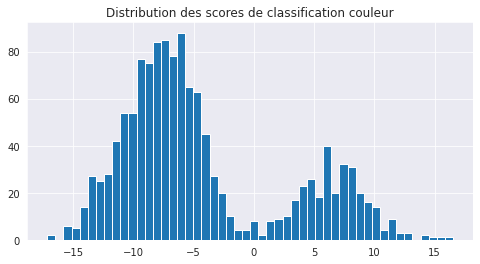

In [29]:
# distribution du score
ax = df['score'].hist(bins=50, figsize=(8,4))
ax.set_title('Distribution des scores de classification couleur');

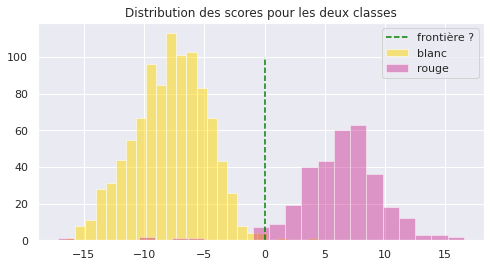

In [57]:
# distribution des scores en différenciant les 2 classes
sns.set_style('darkgrid')
ax = df.loc[df.couleur== 'blanc','score'].hist(bins=25, figsize=(8,4), label='blanc', color='gold', alpha=0.5)
df.loc[df.couleur == 'rouge','score'].hist(bins=25, label='rouge', color = 'mediumvioletred', alpha=0.4, ax=ax)
ax.set_title("Distribution des scores pour les deux classes")
ax.plot([0, 0], [0, 100], color='green', ls='--', label="frontière ?")
ax.legend();

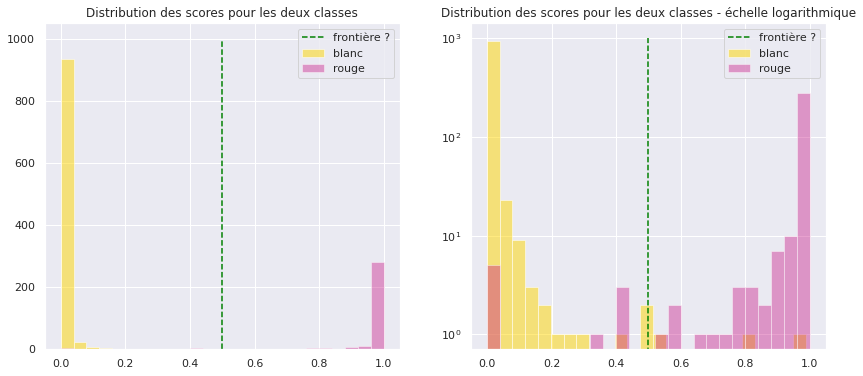

In [59]:
# distribution des probabilités d'être dans la classe "rouge" en différenciant les 2 classes
sns.set_style('darkgrid')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

df.loc[df.couleur== 'blanc','Proba_rouge'].hist(bins=25, label='blanc', color='gold', alpha=0.5, ax=ax1)
df.loc[df.couleur == 'rouge','Proba_rouge'].hist(bins=25, label='rouge', color = 'mediumvioletred', alpha=0.4, ax=ax1)
ax1.set_title("Distribution des scores pour les deux classes")
ax1.plot([0.5, 0.5], [0, 1000], color='green', ls='--', label="frontière ?")
ax1.legend()

df.loc[df.couleur== 'blanc','Proba_rouge'].hist(bins=25, label='blanc', color='gold', alpha=0.5, ax=ax2)
df.loc[df.couleur == 'rouge','Proba_rouge'].hist(bins=25, label='rouge', color = 'mediumvioletred', alpha=0.4, ax=ax2)
ax2.set_title("Distribution des scores pour les deux classes - échelle logarithmique")
ax2.plot([0.5, 0.5], [0, 1000], color='green', ls='--', label="frontière ?")
ax2.set_yscale('log')
ax2.legend();

## Courbe ROC et AUC

*fpr* désigne le False Positive Rate autrement dit le taux de false positive. Si la tâche est de déterminer si un vin est blanc, le taux désigne la proportion de vins rouges classés parmi les vins blancs. C'est l'erreur de classification.

*tpr* désigne le True Positive Rate c'est-à-dire le taux de True Positive.

C'est toujours un peu prise de tête ce genre de notion mais l'avantage c'est qu'on trouve toujours toutes les infos dont on a besoin le moment venu.

#### **7. Calculez le _fpr_ et le _tpr_ en fonction de différents seuils, puis afficher ces valeurs en fonction des seuils et enfin afficher la courbe ROC.**

In [62]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
proba1 = reglog.predict_proba(X_test)[:,1]
fpr, tpr, seuils = roc_curve(y_test, proba1, pos_label='rouge', drop_intermediate=False)

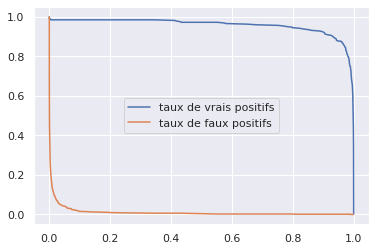

In [63]:
# Taux de faux/vrais positifs en fonction des différentes valeurs de seuil
plt.plot(seuils[1:], tpr[1:], label='taux de vrais positifs')
plt.plot(seuils[1:], fpr[1:], label='taux de faux positifs')
plt.legend();

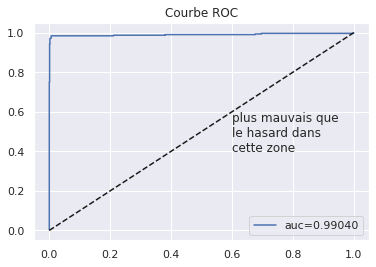

In [64]:
# Mesure de l'AUC
score_auc = auc(fpr[1:], tpr[1:])

# Visualisation de la courbe ROC et de l'AUC
fig, ax = plt.subplots()
ax.plot(fpr[1:], tpr[1:], label='auc=%1.5f' %score_auc)
ax.plot([0,1], [0,1], 'k--')
ax.text(0.6, 0.4, "plus mauvais que \nle hasard dans \ncette zone")
ax.set_title("Courbe ROC")
ax.legend();

## Précision et rappel

Deux autres métriques sont très utilisées, la [précision](https://en.wikipedia.org/wiki/Precision_and_recall) et le [rappel](https://en.wikipedia.org/wiki/Precision_and_recall). Pour chaque classifieur, on peut déterminer un seuil *s* au delà duquel la réponse est validée avec une bonne confiance. Parmi toutes les réponses validées, la précision est le nombre de réponses correctes rapporté au nombre de réponses validées, le rappel est le nombre de réponses correctes rapportées à toutes qui aurait dû être validées. On calcule aussi la métrique *F1* qui est la moyenne harmonique entre les deux.

#### **8. Calculez la précision, le rappel et le F-score puis les afficher.**

In [65]:
from sklearn.metrics import precision_recall_curve
proba1 = reglog.predict_proba(X_test)[:,1]
precision, recall, seuils = precision_recall_curve(y_test, proba1, pos_label=reglog.classes_[1])
precision, recall, seuils

(array([0.24615385, 0.24557352, 0.24576271, ..., 1.        , 1.        ,
        1.        ]),
 array([1.      , 0.996875, 0.996875, ..., 0.00625 , 0.003125, 0.      ]),
 array([3.53174500e-08, 6.41926751e-08, 1.52994643e-07, ...,
        9.99999694e-01, 9.99999854e-01, 9.99999934e-01]))

In [76]:
pr = pd.DataFrame({'seuils':[0]+list(seuils), 'precision':precision, 'rappel':recall})
pr['F1'] = 2 * (pr.precision * pr.rappel) / (pr.precision + pr.rappel)
pr

,seuils,precision,rappel,F1
0,0.000000e+00,0.246154,1.000000,0.395062
1,3.531745e-08,0.245574,0.996875,0.394070
2,6.419268e-08,0.245763,0.996875,0.394314
3,1.529946e-07,0.245952,0.996875,0.394558
4,1.656464e-07,0.246142,0.996875,0.394802
...,...,...,...,...
1255,9.999991e-01,1.000000,0.012500,0.024691
1256,9.999994e-01,1.000000,0.009375,0.018576
1257,9.999997e-01,1.000000,0.006250,0.012422
1258,9.999999e-01,1.000000,0.003125,0.006231


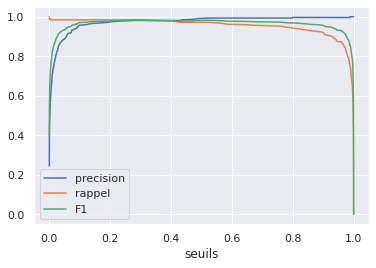

In [77]:
pr.plot(x='seuils', y=['precision', 'rappel', 'F1']);

In [80]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       blanc       0.99      1.00      0.99       980
       rouge       0.99      0.97      0.98       320

    accuracy                           0.99      1300
   macro avg       0.99      0.98      0.99      1300
weighted avg       0.99      0.99      0.99      1300

